In [1]:
import pandas as pd
import datetime as dt
import seaborn as sns
from datetime import timedelta

In [2]:
# Загружаем данные с Яндекс Диска.

In [3]:
df_costomers = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/QXrVDUoQvFhIcg.csv')
df_orders = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/0zWmh1bYP6REbw.csv')
df_order_items = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/xCsQ0FiC-Ue4Lg.csv')

### Смотрю и изучаю данные

Смотрю первые 3 строки каждой таблицы. Смотрю типы столбцов и пропущенные значения. Некоторые типы данных сразу поправляю.

* Таблица 1 - df_costomers. Тут вопросов быть не может. Поля интуитивно понятны.

In [4]:
df_costomers.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


In [5]:
df_costomers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [6]:
df_costomers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

* Таблица 2 - df_orders

In [7]:
df_orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [8]:
df_orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [9]:
# Преобразуем данные к типу datetime64

df_orders[['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date']] =  \
    df_orders[['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date']].apply(pd.to_datetime)

In [10]:
df_orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [11]:
df_orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

Так, ну у этой таблицы есть пропущенные значения. Они связаны с датами, что логично. Разберу чуть позже.

* Таблица 3 - df_order_items

In [12]:
df_order_items.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


In [13]:
df_order_items.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [14]:
df_order_items['shipping_limit_date'] = df_order_items['shipping_limit_date'].apply(pd.to_datetime)

In [15]:
df_order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Даты поправил, пропуски посмотрел. С виду норм таблицы. Самое время вернуться в таблице df_orders и посмотреть её.

Более подробный разбор таблицы df_orders

In [16]:
df_orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04


Вспомним пропущенные значения

In [17]:
df_orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Исходя из описания проекта у нас есть следующие статусы:

#### Статусы заказов

* created - Создан
* invoiced - Выставлен счёт
* approved - Подтверждение оплаты заказа (исходя из описания order_approved_at - это статус подтверждения оплаты)
* processing - Сборка заказа
* shipped - Отправлено
* delivered - Доставлено
* unavailable - Недоступно
* canceled - отменён

Посмотрю как соотносятся пропущенные даты вместе с ними.

In [18]:
df_orders.query('order_status == "created"').head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
7434,b5359909123fa03c50bdb0cfed07f098,438449d4af8980d107bf04571413a8e7,created,2017-12-05 01:07:52,NaT,NaT,NaT,2018-01-11
9238,dba5062fbda3af4fb6c33b1e040ca38f,964a6df3d9bdf60fe3e7b8bb69ed893a,created,2018-02-09 17:21:04,NaT,NaT,NaT,2018-03-07
21441,7a4df5d8cff4090e541401a20a22bb80,725e9c75605414b21fd8c8d5a1c2f1d6,created,2017-11-25 11:10:33,NaT,NaT,NaT,2017-12-12
55086,35de4050331c6c644cddc86f4f2d0d64,4ee64f4bfc542546f422da0aeb462853,created,2017-12-05 01:07:58,NaT,NaT,NaT,2018-01-08
58958,90ab3e7d52544ec7bc3363c82689965f,7d61b9f4f216052ba664f22e9c504ef1,created,2017-11-06 13:12:34,NaT,NaT,NaT,2017-12-01


Ага, понятно, при создании заказа ставится обещанная дата доставки. Смотрим следующий статус

In [19]:
df_orders.query('order_status == "invoiced"').head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
455,38b7efdf33dd5561f4f5d4f6e07b0414,021e84751ba0ead75b6d314a6ead88d9,invoiced,2017-08-01 18:17:41,2017-08-01 18:32:30,NaT,NaT,2017-08-28
1833,51b0dccc8596ce37a930dff2d63a10a2,31bf1057b00f14804278590bbac18b1b,invoiced,2017-05-05 22:34:48,2017-05-05 22:45:12,NaT,NaT,2017-06-06
2116,5504eaa5a86eb25fa666cf2e6b96c701,a30be38e1ed0ffb39b318bf1d15e98d9,invoiced,2017-11-29 08:33:06,2017-11-29 08:56:23,NaT,NaT,2017-12-20


Понятно. Выставляем счёт, после чего он подтверждается оплатой и появляется дата в столбце order_approved_at. У этих заказов видимо ещё не сменился статус на approved. Таких заказов всего 314 из 99 441 (где статус инввойс, но стоит дата оплаты). Смотрим дальше

In [20]:
df_orders.query('order_status == "approved"').head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
44897,a2e4c44360b4a57bdff22f3a4630c173,8886130db0ea6e9e70ba0b03d7c0d286,approved,2017-02-06 20:18:17,2017-02-06 20:30:19,NaT,NaT,2017-03-01
88457,132f1e724165a07f6362532bfb97486e,b2191912d8ad6eac2e4dc3b6e1459515,approved,2017-04-25 01:25:34,2017-04-30 20:32:41,NaT,NaT,2017-05-22


В целом ничего не поменялось. Судя по всему, действительно, у предыдущих заказов в статусе invoiced не обновился на статус approved. Смотрим дальше.

In [21]:
df_orders.query('order_status == "processing"').head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaT,NaT,2016-12-09
741,6a6c7d523fd59eb5bbefc007331af717,d954782ec6c0e911292c8a80757ef28d,processing,2017-11-24 20:09:33,2017-11-24 23:15:15,NaT,NaT,2017-12-20
1192,745e1d4a7f8c4b548881788d4113bb1d,7198d7088442e4ddfe553353d8ddc957,processing,2017-11-17 06:34:36,2017-11-18 02:15:40,NaT,NaT,2017-12-12
1516,1d52ba7197c7acebbb4f826f6585536f,c9c7fe860d602373a9e93f8bfe9d877a,processing,2017-02-13 18:32:55,2017-02-13 18:43:55,NaT,NaT,2017-04-04


На сборке новые данные по датам не добавляюься. Проверяем дальше.

In [22]:
df_orders.query('order_status == "shipped"').head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07
162,36530871a5e80138db53bcfd8a104d90,4dafe3c841d2d6cc8a8b6d25b35704b9,shipped,2017-05-09 11:48:37,2017-05-11 11:45:14,2017-05-11 13:21:47,NaT,2017-06-08
231,4d630f57194f5aba1a3d12ce23e71cd9,6d491c9fe2f04f6e2af6ec033cd8907c,shipped,2017-11-17 19:53:21,2017-11-18 19:50:31,2017-11-22 17:28:34,NaT,2017-12-13
299,3b4ad687e7e5190db827e1ae5a8989dd,1a87b8517b7d31373b50396eb15cb445,shipped,2018-06-28 12:52:15,2018-06-28 13:11:09,2018-07-04 15:20:00,NaT,2018-08-03


Появилась дата в *order_delivered_carrier_date* - время подачи в логистическую службу

In [23]:
df_orders.query('order_status == "delivered"').head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


А тут пояоявилась дата в *order_delivered_customer_date* - время доставки заказа. Осталось выяснить, что за статусы *unavailable* и *canceled*

In [24]:
df_orders.query('order_status == "unavailable"').head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05
586,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaT,NaT,2018-02-16
687,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaT,NaT,2017-09-05
737,d57e15fb07fd180f06ab3926b39edcd2,470b93b3f1cde85550fc74cd3a476c78,unavailable,2018-01-08 19:39:03,2018-01-09 07:26:08,NaT,NaT,2018-02-06
1160,2f634e2cebf8c0283e7ef0989f77d217,7353b0fb8e8d9675e3a704c60ca44ebe,unavailable,2017-09-27 20:55:33,2017-09-28 01:32:50,NaT,NaT,2017-10-27


Интересно, по предыдущим этапам я знаю последовательность Создание - инвойс - оплата - сборка - отправка в логистическую - доставка. Тут видно что заказ прошёл этам подтверждения оплаты, но нет даты в передачу логитической службы. Заказ потерялся на складе? Закончился, а данные, например на сайте не успели обновиться и клиент таки смог заказать отсутствующий товар? Записал на листок, интересно. Посмотрю последний статус - canceled.

In [25]:
df_orders.query('order_status == "canceled"').head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaT,NaT,2018-08-14
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaT,2018-02-22
1058,3a129877493c8189c59c60eb71d97c29,0913cdce793684e52bbfac69d87e91fd,canceled,2018-01-25 13:34:24,2018-01-25 13:50:20,2018-01-26 21:42:18,NaT,2018-02-23
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17


О как, то есть заказ может отмениться после передачу в логистическую службу. Так как стоит дата order_delivered_carrier_date.
Вижу, что есть не аппрувнутые заказы (без подтверждения оплаты, так как не стоит дата в order_approved_at). А могут доставить заказ, а потом отменить?

In [26]:
df_orders.query('order_status == "canceled" & order_delivered_customer_date != "NaT"').head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
2921,1950d777989f6a877539f53795b4c3c3,1bccb206de9f0f25adc6871a1bcf77b2,canceled,2018-02-19 19:48:52,2018-02-19 20:56:05,2018-02-20 19:57:13,2018-03-21 22:03:51,2018-03-09
8791,dabf2b0e35b423f94618bf965fcb7514,5cdec0bb8cbdf53ffc8fdc212cd247c6,canceled,2016-10-09 00:56:52,2016-10-09 13:36:58,2016-10-13 13:36:59,2016-10-16 14:36:59,2016-11-30
58266,770d331c84e5b214bd9dc70a10b829d0,6c57e6119369185e575b36712766b0ef,canceled,2016-10-07 14:52:30,2016-10-07 15:07:10,2016-10-11 15:07:11,2016-10-14 15:07:11,2016-11-29
59332,8beb59392e21af5eb9547ae1a9938d06,bf609b5741f71697f65ce3852c5d2623,canceled,2016-10-08 20:17:50,2016-10-09 14:34:30,2016-10-14 22:45:26,2016-10-19 18:47:43,2016-11-30
92636,65d1e226dfaeb8cdc42f665422522d14,70fc57eeae292675927697fe03ad3ff5,canceled,2016-10-03 21:01:41,2016-10-04 10:18:57,2016-10-25 12:14:28,2016-11-08 10:58:34,2016-11-25


Ого, видимо заказ может отмениться на любом статусе после поступления. А если он оплачен и доставлен, то вероятно это возврат. Ну в целом теперь понятно.

#### Выводы по предобработке 

1) По ходу выполнения заданий я буду придерживаться следующий логики. Оплаченный заказ тот, в котором указана дата в столбце "order_approved_at". На мой вгляд это логично. Заказ может потеряться, не доставиться логистической службой. Но сам факт оплаты как раз в этом столбце. Он ведь может вообще не доставиться логистической службой по независящим для нас обстоятельствам. Например пробки на дорогах и клиент отменил заказ, чтобы долго не ждать. Ну или что-то подобное.

2) Заказ может быть получен клиентом, но при этом быть в статусе "canceled". Вероятно возврат.

3) Я просмотрел все задачи. Для некоторых задач нужно найти количество пользователей совершивших покупку, для некоторых - дату покупки. Я буду считать так: заказ считается оплаченным, когда появляется дата в *order_approved_at* - описал выше. Но дату я буду смотреть по дате поступления заказа - *order_purchase_timestamp*. Я считаю так более правильно по нескольким причинам:

- Пользователь оформил заказ в пятницу и уехал на дачу, до него не дозвонились, скинули инвойс, пользователь оплатил в понедельник. Оплату принёс понедельник, но сгенерировала заказ именно пятница. Это может негативно влиять на те же платные каналы, привлекающие заказы. Мы скажем что хорошо работает понедельник, а пятница плохо (образно). Рекламу отключат в пятницу, и мы не получим заказов в понедельник. Эта образная ситуация, но она логичная

- Многие делают заказы в канун нового года (тоже образно). Но потом делают возврат (по разным причинам) в Январе. Январь может выйти отрицательным и будет непонятно почему с первого взгляда. Куда удобней делать отмены "задним числом" в декабрь. Да, с одной стороны придётся отматывать чуть назад статистику, но ориентироваться проще. Хотя на вкус и цвет товарищей нет.

4) Таблицы связаны между собой следующим образом: customer_unique_id -> customer_id -> order_id

Один пользователь может заказывать с различных устройств. По этому у одного customer_id может быть несколько order_id. А у одного уникального customer_unique_id может быть несколько customer_id (если пользователь делает заказы с разных устройств)

Вроде всё объяснил. С виду логично. Я считал сначала по статусам, но в итоге я решил что именно такой вариант описания мне нравится и сделал работу по нему.

### Задание 1
### Сколько у нас пользователей, которые совершили покупку только один раз? (7 баллов) 

In [27]:
df_orders.order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

#### Статусы заказов

* created - Создан
* invoiced - Выставлен счёт
* approved - Подтверждение оплаты заказа (исходя из описания проекта, order_approved_at - дата подтверждения оплаты)
* processing - Сборка заказа
* shipped - Отправлено
* delivered - Доставлено
* unavailable - Недоступно
* canceled - отменён

Исходя из описания со страницы задания("order_approved_at —  время подтверждения оплаты заказа"), оплатой можно считать этап подверждения заказа.

Но фильтровать по только по статусу "approved" нет смысла. Заказ может изменить свой статус. Брать заказы со статусами "approved / processing / shipped / delivered" тоже не совсем корректно. Заказ могут доставить, а потом отменить. А отменить могут по различным причинам.

Вот кстати пример даже доставленных заказов (судя по столбцу "order_delivered_customer_date") которые находятся в статусе отмены. Скорее всего товар купили, а потом вернули.

In [28]:
df_orders.query('order_approved_at != "NaT" & order_status == "canceled" & order_delivered_customer_date != "NaT"')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
2921,1950d777989f6a877539f53795b4c3c3,1bccb206de9f0f25adc6871a1bcf77b2,canceled,2018-02-19 19:48:52,2018-02-19 20:56:05,2018-02-20 19:57:13,2018-03-21 22:03:51,2018-03-09
8791,dabf2b0e35b423f94618bf965fcb7514,5cdec0bb8cbdf53ffc8fdc212cd247c6,canceled,2016-10-09 00:56:52,2016-10-09 13:36:58,2016-10-13 13:36:59,2016-10-16 14:36:59,2016-11-30
58266,770d331c84e5b214bd9dc70a10b829d0,6c57e6119369185e575b36712766b0ef,canceled,2016-10-07 14:52:30,2016-10-07 15:07:10,2016-10-11 15:07:11,2016-10-14 15:07:11,2016-11-29
59332,8beb59392e21af5eb9547ae1a9938d06,bf609b5741f71697f65ce3852c5d2623,canceled,2016-10-08 20:17:50,2016-10-09 14:34:30,2016-10-14 22:45:26,2016-10-19 18:47:43,2016-11-30
92636,65d1e226dfaeb8cdc42f665422522d14,70fc57eeae292675927697fe03ad3ff5,canceled,2016-10-03 21:01:41,2016-10-04 10:18:57,2016-10-25 12:14:28,2016-11-08 10:58:34,2016-11-25
94399,2c45c33d2f9cb8ff8b1c86cc28c11c30,de4caa97afa80c8eeac2ff4c8da5b72e,canceled,2016-10-09 15:39:56,2016-10-10 10:40:49,2016-10-14 10:40:50,2016-11-09 14:53:50,2016-12-08


Так что самое логичное решение следующее:

Нужно взять все НЕ ПУСТЫЕ строки столбца order_approved_at и считать, что это оплаченные заказы. Этой логики я буду придерживаться во всех следующих шагах.

customer_unique_id -> customer_id -> order_id

Один пользователь может заказывать с различных устройств. По этому у одного customer_id может быть несколько order_id.
А у одного уникального customer_unique_id может быть несколько customer_id (если пользователь делает заказы с разных устройств)

Следовательно лучше объединять таблицы и смотеть именно уникальный идентификатор.

In [29]:
df_orders.merge(df_costomers, how = 'inner', on='customer_id') \
    .dropna(subset=['order_approved_at']) \
    .groupby('customer_unique_id', as_index=False) \
    .agg({'order_id':'count'}) \
    .query("order_id == 1") \
    .rename(columns = {'order_id':'orders'})

,customer_unique_id,orders
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
95992,fffcf5a5ff07b0908bd4e2dbc735a684,1
95993,fffea47cd6d3cc0a88bd621562a9d061,1
95994,ffff371b4d645b6ecea244b27531430a,1
95995,ffff5962728ec6157033ef9805bacc48,1


Ответ: 93049 пользователя, совершивших 1 заказ.

### Задание 2
### Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)? (5 баллов) 

Снова взгляну на таблицу, чтобы далеко не скролить.

In [30]:
df_orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04


У нас есть столбец order_delivered_customer_date.

Если заказ доставлен клиенту - там появляется дата. Если нет - там пустое значение. (логика как и в предыдущем задании)

Судя по данным. Заказ может быть доставлен (order_delivered_customer_date > 0), но у заказа будет статус canceled (показал в табличке ниже). Скорее всего даставили, но потом отменили. А нам нужны данные по заказам, которые не были доставлены. По этому опять же, проще не пустым полям в датах.

In [31]:
df_orders.dropna(subset=['order_delivered_customer_date']) \
    .query('order_status =="canceled"')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
2921,1950d777989f6a877539f53795b4c3c3,1bccb206de9f0f25adc6871a1bcf77b2,canceled,2018-02-19 19:48:52,2018-02-19 20:56:05,2018-02-20 19:57:13,2018-03-21 22:03:51,2018-03-09
8791,dabf2b0e35b423f94618bf965fcb7514,5cdec0bb8cbdf53ffc8fdc212cd247c6,canceled,2016-10-09 00:56:52,2016-10-09 13:36:58,2016-10-13 13:36:59,2016-10-16 14:36:59,2016-11-30
58266,770d331c84e5b214bd9dc70a10b829d0,6c57e6119369185e575b36712766b0ef,canceled,2016-10-07 14:52:30,2016-10-07 15:07:10,2016-10-11 15:07:11,2016-10-14 15:07:11,2016-11-29
59332,8beb59392e21af5eb9547ae1a9938d06,bf609b5741f71697f65ce3852c5d2623,canceled,2016-10-08 20:17:50,2016-10-09 14:34:30,2016-10-14 22:45:26,2016-10-19 18:47:43,2016-11-30
92636,65d1e226dfaeb8cdc42f665422522d14,70fc57eeae292675927697fe03ad3ff5,canceled,2016-10-03 21:01:41,2016-10-04 10:18:57,2016-10-25 12:14:28,2016-11-08 10:58:34,2016-11-25
94399,2c45c33d2f9cb8ff8b1c86cc28c11c30,de4caa97afa80c8eeac2ff4c8da5b72e,canceled,2016-10-09 15:39:56,2016-10-10 10:40:49,2016-10-14 10:40:50,2016-11-09 14:53:50,2016-12-08


По этому делаем следующим образом:

* Нужно взять все строки с пустыми значениями ***order_delivered_customer_date***
* Группируем по ***order_status*** и дате создания заказа ***order_purchase_timestamp***, во время группировки переводим в формат ГОД-МЕСЯЦ
* Суммируем количество заказов
* Ещё раз группируем, уже по статусу и агрегируем по среднему количеству заказов.
* Переименовываем столбец со средним значением.

In [32]:
df_orders.query('order_delivered_customer_date == "NaT"') \
    .groupby(['order_status', df_orders.order_purchase_timestamp.dt.strftime('%Y-%m')]) \
    .agg({'order_id':'count'}) \
    .groupby('order_status') \
    .agg({'order_id':'mean'}) \
    .round() \
    .sort_values("order_id") \
    .rename(columns = {'order_id':'mean_no_deliv'})

,mean_no_deliv
order_status,
approved,1.0
created,2.0
delivered,2.0
invoiced,15.0
processing,16.0
canceled,26.0
unavailable,29.0
shipped,48.0


Ответ: в таблице выше. Но вообще стоит учесть, что все статусы кроме canceled и unavailable ещё могут доставиться. canceled - отменён, unavailable - недоступен (скорее всего уже тоже не доставится).

### Задание 3
### По каждому товару определить, в какой день недели товар чаще всего покупается. (5 баллов)

Здесь, а отличиие от предыдущих заданий стоит немного изменить логику. (описывал в предобработке). Меня спрашивают в какой день недели товар чаще всего покупался. Отличие в том, что здесь я не могу считать продажи по непустому столбцу order_approved_at.

Во первых, потому что день оплаты может не совпадать с днём поступления заказа. Такое легко может быть. Не дозвонились с первого раза, или заказ оформили в 23:55, а оплатили в 00:15

Во вторых, это может сбить с толку. Например мы можем генерить рекламой поступающие заказы в пятницу, а оплачивать их будут в понедельник, потому что тем же летом все едут на дачу на выходные (образно, так это могут быть любые праздники или ещё что-либо). Это же не значит что понедельник генерит продажи? Продажу принесла пятница, просто оплатили на несколько дней позже. А ту же рекламу могут ограничить в пятницу, если сказать что она не плохо генерит продажи (это в общем и целом). Это всё может повлиять на объём продаж не в лучшую сторону.

Ниже я быстренько сделал тестовую табличку, где наглядно видна разница даже в несколько дней, чтобы "прикинуть". Таких заказов оказалось более чем достаточно.

In [33]:
test_step_3 = df_orders

In [34]:
test_step_3['delta'] = (df_orders['order_approved_at'] - df_orders['order_purchase_timestamp']).dt.days

In [35]:
test_step_3.query('delta>1').shape[0]

5166

In [36]:
test_step_3.query('delta>1').head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delta
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09,2.0
15,dcb36b511fcac050b97cd5c05de84dc3,3b6828a50ffe546942b7a473d70ac0fc,delivered,2018-06-07 19:03:12,2018-06-12 23:31:02,2018-06-11 14:54:00,2018-06-21 15:34:32,2018-07-04,5.0
38,434d158e96bdd6972ad6e6d73ddcfd22,2a1dfb647f32f4390e7b857c67458536,delivered,2018-06-01 12:23:13,2018-06-05 03:35:15,2018-06-08 11:49:00,2018-06-18 21:32:52,2018-07-17,3.0


Итак, что делаем:

Нужно склеить таблицу с товарами и покупками. После чего сгруппировать данные товар-день недели - количество покупок.

Отсортировать данные по убыванию и удалить дубликаты.

Покупкой будем считать все строки с непустыми столбцами "order_approved_at". Так как я считаю это подтверждением оплаты исходя из описания проекта в lms. А группировать буду по "order_purchase_timestamp"

In [37]:
df_orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delta
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0.0


In [38]:
df_order_items.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


In [39]:
df_step3 = df_order_items.merge(df_orders, on='order_id', how='inner')

In [40]:
df_step3.dropna(subset=['order_approved_at']) \
    .groupby(['product_id', df_orders.order_purchase_timestamp.dt.strftime('%A')]) \
    .agg({'order_id':'count'}) \
    .sort_values('order_id', ascending = False) \
    .reset_index() \
    .drop_duplicates(subset='product_id') \
    .rename(columns = {'order_purchase_timestamp':'week_day','order_id':'count_buy'})

,product_id,week_day,count_buy
0,99a4788cb24856965c36a24e339b6058,Tuesday,78
1,422879e10f46682990de24d770e7f83d,Tuesday,75
2,aca2eb7d00ea1a7b8ebd4e68314663af,Thursday,75
11,53759a2ecddad2bb87a079a1f1519f73,Monday,67
12,389d119b48cf3043d311335e499d9c6b,Thursday,64
...,...,...,...
59447,618a8dac41d5f04a248927a5f44c1f13,Wednesday,1
59448,618c65cb5359281b2c830b9f3f2e1f36,Tuesday,1
59449,61919b39651acb61ec24307ed8b9502d,Saturday,1
59450,619215fa0c29f244c5aa21084cf8d957,Wednesday,1


Готово!

### Задание 4
###  Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть. (8 баллов) 

Нам нужно склеить таблицу с ордерами и уникальными пользователями

In [41]:
df_orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delta
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0.0


In [42]:
df_costomers.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


Клеим, смотрим, всё ок.

In [43]:
df_step4 = df_costomers.merge(df_orders, on='customer_id')

In [44]:
df_step4.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delta
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,0.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,0.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1.0


Добавляем 2 столбца. Месяц покупки и количество дней в этом месяце.

In [45]:
df_step4['order_purchase_month'] = df_step4['order_purchase_timestamp'].dt.month_name()

In [46]:
df_step4['weeks_in_month'] = df_step4.order_purchase_timestamp.dt.days_in_month / 7

In [47]:
df_step4['year'] = df_step4.order_purchase_timestamp.dt.year

In [48]:
df_step4.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delta,order_purchase_month,weeks_in_month,year
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,0.0,May,4.428571,2017
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,0.0,January,4.428571,2018
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1.0,May,4.428571,2018


Убираю заказы, которые не оплатили, группирую, аггрегирую.

In [49]:
df_step4 = df_step4.dropna(subset=['order_approved_at']) \
    .groupby(['customer_unique_id','year', 'order_purchase_month','weeks_in_month']) \
    .agg({'order_id':'count'}) \
    .rename(columns={'order_id': 'orders_count'}) \
    .reset_index()

Добавляю столбец со средним значением покупок в месяц.

In [50]:
df_step4 = df_step4.assign(appr_purchase_mean_by_week = df_step4.orders_count / df_step4.weeks_in_month)

In [51]:
df_step4.head(3)

,customer_unique_id,year,order_purchase_month,weeks_in_month,orders_count,appr_purchase_mean_by_week
0,0000366f3b9a7992bf8c76cfdf3221e2,2018,May,4.428571,1,0.225806
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018,May,4.428571,1,0.225806
2,0000f46a3911fa3c0805444483337064,2017,March,4.428571,1,0.225806


Группирую по по уникальному пользователю, году и месяцу. Дальше считаю среднее по оплаченным заказам.

In [52]:
df_step4.groupby(['customer_unique_id', 'order_purchase_month']) \
    .agg({'appr_purchase_mean_by_week':'mean'}) \
    .reset_index() \
    .sort_values('customer_unique_id', ascending=True)

,customer_unique_id,order_purchase_month,appr_purchase_mean_by_week
0,0000366f3b9a7992bf8c76cfdf3221e2,May,0.225806
1,0000b849f77a49e4a4ce2b2a4ca5be3f,May,0.225806
2,0000f46a3911fa3c0805444483337064,March,0.225806
3,0000f6ccb0745a6a4b88665a16c9f078,October,0.225806
4,0004aac84e0df4da2b147fca70cf8255,November,0.233333
...,...,...,...
97866,fffcf5a5ff07b0908bd4e2dbc735a684,June,0.233333
97867,fffea47cd6d3cc0a88bd621562a9d061,December,0.225806
97868,ffff371b4d645b6ecea244b27531430a,February,0.250000
97869,ffff5962728ec6157033ef9805bacc48,May,0.225806


Я бы добавил ещё год, потому что в одном году может быть всё хорошо, в другом какие-то значимые изменения. В задании ничего не сказано про год, но посмотреть данные в таком разреже тоже интересно.

In [53]:
df_step4.groupby(['customer_unique_id', 'year', 'order_purchase_month']) \
    .agg({'appr_purchase_mean_by_week':'mean'}) \
    .reset_index() \
    .sort_values('customer_unique_id', ascending=True)

,customer_unique_id,year,order_purchase_month,appr_purchase_mean_by_week
0,0000366f3b9a7992bf8c76cfdf3221e2,2018,May,0.225806
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018,May,0.225806
2,0000f46a3911fa3c0805444483337064,2017,March,0.225806
3,0000f6ccb0745a6a4b88665a16c9f078,2017,October,0.225806
4,0004aac84e0df4da2b147fca70cf8255,2017,November,0.233333
...,...,...,...,...
97911,fffcf5a5ff07b0908bd4e2dbc735a684,2017,June,0.233333
97912,fffea47cd6d3cc0a88bd621562a9d061,2017,December,0.225806
97913,ffff371b4d645b6ecea244b27531430a,2017,February,0.250000
97914,ffff5962728ec6157033ef9805bacc48,2018,May,0.225806


### Задание 5
###  Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц. Описание подхода можно найти тут. (10 баллов)

Нам поднадобятся 2 таблицы:

In [54]:
df_orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delta
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0.0


In [55]:
df_costomers.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


Объединяем их

In [56]:
df_step5 = df_costomers.merge(df_orders, on='customer_id')

In [57]:
df_step5.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delta
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,0.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,0.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1.0


Оставляем только оплаченные заказы

In [58]:
df_step5 = df_step5.dropna(subset=['order_approved_at'])

Считаем дату первого заказа по уникальным идентификаторам

In [59]:
df_step5_first_orders = df_step5.groupby('customer_unique_id', as_index=False) \
        .agg({'order_purchase_timestamp': 'min'}) \
        .rename(columns = {'order_purchase_timestamp':'date_first_order'})

Соединяем с исходной таблицей

In [60]:
df_step5 = df_step5.merge(df_step5_first_orders)

In [61]:
df_step5.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delta,date_first_order
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,0.0,2017-05-16 15:05:35
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,0.0,2018-01-12 20:48:24
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1.0,2018-05-19 16:07:45


Тут всё ок.

Теперь группируем данные по дате первого заказа и получаем когорты.

Так же сгруппируем данные внутри каждого месяца, чтобы видеть количество заказов.

In [62]:
df_step5_cohorts = df_step5 \
        .groupby([df_step5.date_first_order.dt.strftime('%Y-%m'), df_step5.order_purchase_timestamp.dt.strftime('%Y-%m')]) \
        .agg({'order_id':'count'}) \
        .rename(columns = {'order_purchase_timestamp':'order_date', 'order_id':'count'}) \
        .reset_index()

Смотрим, за какие месяцы вообще есть данные. (больше для прикидки и понимания что вообще есть по данным)

In [63]:
df_step5_cohorts.date_first_order.unique()

array(['2016-09', '2016-10', '2016-12', '2017-01', '2017-02', '2017-03',
       '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09',
       '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03',
       '2018-04', '2018-05', '2018-06', '2018-07', '2018-08'],
      dtype=object)

Переводим даты в нужный формат

In [64]:
# Преобразуем данные к типу datetime

df_step5_cohorts[['date_first_order','order_purchase_timestamp']] =  \
    df_step5_cohorts[['date_first_order','order_purchase_timestamp']].apply(pd.to_datetime)

In [65]:
df_step5_cohorts.dtypes

date_first_order            datetime64[ns]
order_purchase_timestamp    datetime64[ns]
count                                int64
dtype: object

In [66]:
df_step5_cohorts.head(3)

,date_first_order,order_purchase_timestamp,count
0,2016-09-01,2016-09-01,4
1,2016-10-01,2016-10-01,318
2,2016-10-01,2017-04-01,1


Считаем количество месяцев меджу последней и первой покупкой.

In [67]:
df_step5_cohorts = df_step5_cohorts.assign(
    Months=
    (df_step5_cohorts.order_purchase_timestamp.dt.year - df_step5_cohorts.date_first_order.dt.year) * 12 +
    (df_step5_cohorts.order_purchase_timestamp.dt.month - df_step5_cohorts.date_first_order.dt.month)
)

In [68]:
df_step5_cohorts.head(3)

,date_first_order,order_purchase_timestamp,count,Months
0,2016-09-01,2016-09-01,4,0
1,2016-10-01,2016-10-01,318,0
2,2016-10-01,2017-04-01,1,6


Считаем максимальное количество ордеров в каждом месяце (чтобы потом посчитать доли)

In [69]:
df_step5_max_values = pd.DataFrame(df_step5_cohorts.groupby('date_first_order')['count'].max()) \
            .reset_index() \
            .rename(columns = {'count':'max_orders'})

Соединяем с исходной таблицей

In [70]:
df_step5_cohorts = df_step5_cohorts.merge(df_step5_max_values, on='date_first_order')

Вот что вышло. Отлично.

In [71]:
df_step5_cohorts.head(3)

,date_first_order,order_purchase_timestamp,count,Months,max_orders
0,2016-09-01,2016-09-01,4,0,4
1,2016-10-01,2016-10-01,318,0,318
2,2016-10-01,2017-04-01,1,6,318


Теперь считаем доли. Разделив количество заказов в месяц, на максимальное количество ордеров.

In [72]:
df_step5_cohorts = df_step5_cohorts.assign(dolya = df_step5_cohorts['count'] / df_step5_cohorts['max_orders'] * 100).round(2)

In [73]:
df_step5_cohorts.head(3)

,date_first_order,order_purchase_timestamp,count,Months,max_orders,dolya
0,2016-09-01,2016-09-01,4,0,4,100.00
1,2016-10-01,2016-10-01,318,0,318,100.00
2,2016-10-01,2017-04-01,1,6,318,0.31


Переворачиваем таблицу и смотрим где на самый высокий Retention в 3м месяце. Нам нужен столбец с номером 3.

In [74]:
df_step5_cohorts.pivot(index='date_first_order', columns='Months', values='dolya')

Months,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20
date_first_order,,,,,,,,,,,,,,,,,,,,
2016-09-01,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-01,100.0,NaN,NaN,NaN,NaN,NaN,0.31,NaN,NaN,0.31,NaN,0.31,NaN,0.31,NaN,0.31,NaN,0.31,0.63,0.63
2016-12-01,100.0,100.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01,100.0,0.38,0.25,0.13,0.38,0.13,0.50,0.13,0.13,NaN,0.38,0.13,0.75,0.38,0.13,0.13,0.25,0.38,0.13,NaN
2017-02-01,100.0,0.23,0.28,0.11,0.40,0.11,0.23,0.17,0.11,0.23,0.11,0.28,0.17,0.17,0.11,0.06,0.06,0.28,NaN,NaN
2017-03-01,100.0,0.52,0.34,0.45,0.34,0.15,0.15,0.30,0.34,0.07,0.37,0.15,0.22,0.11,0.15,0.22,0.07,0.15,NaN,NaN
2017-04-01,100.0,0.63,0.25,0.21,0.34,0.25,0.38,0.29,0.29,0.17,0.25,0.08,0.08,0.04,0.08,0.08,0.25,NaN,NaN,NaN
2017-05-01,100.0,0.49,0.57,0.38,0.30,0.38,0.46,0.16,0.25,0.35,0.25,0.33,0.27,0.03,0.22,0.30,NaN,NaN,NaN,NaN
2017-06-01,100.0,0.47,0.38,0.41,0.25,0.38,0.38,0.22,0.13,0.22,0.31,0.34,0.16,0.13,0.22,NaN,NaN,NaN,NaN,NaN


Ответ: в 2017-03-01 самый высокий Retention в 3м месяце. Он составляет 0.45%

### Задание 6
###  Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю. Описание подхода можно найти тут. (35 баллов)

В этом задании нам понадобятся все 3 исходные таблицы.

In [75]:
df_orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delta
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0.0


In [76]:
df_order_items.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


In [77]:
df_costomers.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


In [78]:
df_step_6 = df_order_items.merge(df_orders, on='order_id')

In [79]:
df_step_6 = df_step_6.merge(df_costomers, on='customer_id')

Смотрим что получилось. Отлично!

In [80]:
df_step_6.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delta,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,0.0,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,0.0,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,0.0,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG


Продажи буду смотреть как и раньше. По полю order_approved_at

Если там есть дата - значит оплата подтвердилась и можно отсюда считать покупку от даты в order_purchase_timestamp.

По аналогии с примером из задания (в описании проекта) нахожу последнюю дату заказа.

In [81]:
last_day = df_step_6.order_purchase_timestamp.max()

In [82]:
today = last_day + timedelta(days=1)

#### Создаём таблицу RFM

* R - время от последней покупки пользователя до текущей даты.
* F - суммарное количество покупок у пользователя за всё время.
* M - стоимость покупок за всё время.

Удаляем строки, где столбец order_approved_at пустой. Группируем, аггрегируем.

In [83]:
df_step_6_p1 = df_step_6.dropna(subset=['order_approved_at']) \
    .groupby(['customer_unique_id', 'order_id', 'order_purchase_timestamp']) \
    .agg({'price': lambda x: x.sum()}).reset_index()

In [84]:
df_step_6_p1.head(3)

,customer_unique_id,order_id,order_purchase_timestamp,price
0,0000366f3b9a7992bf8c76cfdf3221e2,e22acc9c116caa3f2b7121bbb380d08e,2018-05-10 10:56:27,129.9
1,0000b849f77a49e4a4ce2b2a4ca5be3f,3594e05a005ac4d06a72673270ef9ec9,2018-05-07 11:11:27,18.9
2,0000f46a3911fa3c0805444483337064,b33ec3b699337181488304f362a6b734,2017-03-10 21:05:03,69.0


На всякий случай посмотрю как вообще записываются покупки в заказы. Вижу, что ***order_id*** один и тот же. (таблица ниже)

Товары записываются в новой строке. Количество не указано. То есть если будут 2 одинаковых товара. Каждый запишется в новую строку с новым ***order_item_id***

In [85]:
df_step_6.query('customer_unique_id == "fffcf5a5ff07b0908bd4e2dbc735a684"')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delta,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
50318,725cf8e9c24e679a8a5a32cb92c9ce1e,1,c100e5fef1abb5e1c5054d1dac2d83ac,17f51e7198701186712e53a39c564617,2017-06-25 21:15:16,890.0,258.28,74be082247cd677a147d83ee670e9d53,delivered,2017-06-08 21:00:36,2017-06-08 21:15:16,2017-06-23 13:03:27,2017-07-06 09:22:00,2017-08-02,0.0,fffcf5a5ff07b0908bd4e2dbc735a684,55250,sanharo,PE
50319,725cf8e9c24e679a8a5a32cb92c9ce1e,2,bbc5419bc92d76e27795c9ec2c233c64,17f51e7198701186712e53a39c564617,2017-06-25 21:15:16,680.0,239.14,74be082247cd677a147d83ee670e9d53,delivered,2017-06-08 21:00:36,2017-06-08 21:15:16,2017-06-23 13:03:27,2017-07-06 09:22:00,2017-08-02,0.0,fffcf5a5ff07b0908bd4e2dbc735a684,55250,sanharo,PE


In [86]:
df_step_6_RFM = df_step_6_p1.groupby('customer_unique_id') \
    .agg({'order_purchase_timestamp': lambda x: (today - x.max()).days, 'order_id': lambda x: len(x), 'price': lambda x: x.sum()}) \
    .rename(columns={'order_purchase_timestamp': 'R', 'order_id': 'F', 'price': 'M'}) \
    .reset_index()

In [87]:
df_step_6_RFM.head()

,customer_unique_id,R,F,M
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90
2,0000f46a3911fa3c0805444483337064,542,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00


Буду разбивать на диапазоны от 1 до 5: до 20, 20-40, 40-60, 60-80 и выше 80 %

In [88]:
RFM_segments = df_step_6_RFM.quantile(q=[0.20, 0.40, 0.60, 0.80]).round(0).to_dict()

In [89]:
RFM_segments

{'R': {0.2: 98.0, 0.4: 182.0, 0.6: 273.0, 0.8: 389.0},
 'F': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0},
 'M': {0.2: 40.0, 0.4: 70.0, 0.6: 110.0, 0.8: 180.0}}

Ага, с квантилями по F(частоте) вышло плохо. Будет либо 1, либо 5. Большинство сделало по 1 заказу. Тогда разобью вручную.

Сначала посмотрю на распределение по заказам

In [90]:
df_step_6_p1.head()

,customer_unique_id,order_id,order_purchase_timestamp,price
0,0000366f3b9a7992bf8c76cfdf3221e2,e22acc9c116caa3f2b7121bbb380d08e,2018-05-10 10:56:27,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,3594e05a005ac4d06a72673270ef9ec9,2018-05-07 11:11:27,18.90
2,0000f46a3911fa3c0805444483337064,b33ec3b699337181488304f362a6b734,2017-03-10 21:05:03,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,41272756ecddd9a9ed0180413cc22fb6,2017-10-12 20:29:41,25.99
4,0004aac84e0df4da2b147fca70cf8255,d957021f1127559cd947b62533f484f7,2017-11-14 19:45:42,180.00


In [91]:
df_step_6_RFM.groupby('F').agg({'customer_unique_id':'count'})

,customer_unique_id
F,
1,92495
2,2672
3,192
4,29
5,9
6,5
7,3
9,1
16,1


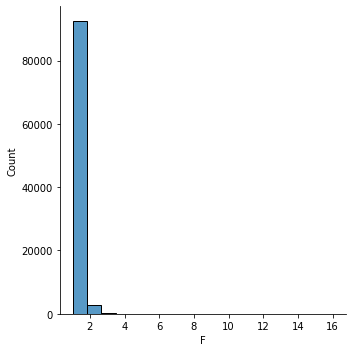

In [92]:
sns.displot(x='F', data=df_step_6_RFM);

Ну теперь точно понятно, почему F-сегмент так криво разбился по квантилям. Большинство сделали 1 покупку.

Не беда, разобью сам на сегменты 0-1 / 2-3 / 4-5 / 6-7 / 7+. Вроде адекватно. Те же 5 периодов

Удаляю сегмент F из списка с квартилями и заполняю вручную. Мне так быстрее всего.

In [93]:
RFM_segments.pop('F')

{0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0}

In [94]:
RFM_segments

{'R': {0.2: 98.0, 0.4: 182.0, 0.6: 273.0, 0.8: 389.0},
 'M': {0.2: 40.0, 0.4: 70.0, 0.6: 110.0, 0.8: 180.0}}

In [95]:
RFM_segments['F']= {1: 1, 2: 3, 3: 5, 4: 7}

In [96]:
RFM_segments

{'R': {0.2: 98.0, 0.4: 182.0, 0.6: 273.0, 0.8: 389.0},
 'M': {0.2: 40.0, 0.4: 70.0, 0.6: 110.0, 0.8: 180.0},
 'F': {1: 1, 2: 3, 3: 5, 4: 7}}

Напишу 3 функции. Сделаю 3 штуки. Каждую под свой показатель. В примере из задания делали 2 функции, но у меня так не получится, потому что F плохо разбивается по квантилям. Изначально я сделал 1 большую функцию, но потом понял, что так не стоит делать. Читаемость страдает.

In [97]:
def r_score(x):
    if x <= RFM_segments['R'][0.2]:
        return 5
    elif x <= RFM_segments['R'][0.4]:
        return 4
    elif x <= RFM_segments['R'][0.6]:
        return 3
    elif x <= RFM_segments['R'][0.8]:
        return 2
    else:
        return 1

In [98]:
def f_score (x):
    if x <= RFM_segments['F'][1]:
        return 1
    elif x <= RFM_segments['F'][2]:
        return 2
    elif x <= RFM_segments['F'][3]:
        return 3
    elif x <= RFM_segments['F'][4]:
        return 4
    else:
        return 5

In [99]:
def m_score (x):
    if x <= RFM_segments['M'][0.2]:
        return 1
    elif x <= RFM_segments['M'][0.4]:
        return 2
    elif x <= RFM_segments['M'][0.6]:
        return 3
    elif x <= RFM_segments['M'][0.8]:
        return 4
    else:
        return 5

Применяю функцию к каждой строке

In [100]:
df_step_6_RFM['R_segment'] = df_step_6_RFM['R'].apply(lambda x: r_score(x))
df_step_6_RFM['F_segment'] = df_step_6_RFM['F'].apply(lambda x: f_score(x))
df_step_6_RFM['M_segment'] = df_step_6_RFM['M'].apply(lambda x: m_score(x))

In [101]:
df_step_6_RFM.head()

,customer_unique_id,R,F,M,R_segment,F_segment,M_segment
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90,4,1,4
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,4,1,1
2,0000f46a3911fa3c0805444483337064,542,1,69.00,1,1,2
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,2,1,1
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00,2,1,4


Пока всё отлично. Склеим сегменты в один столбец

In [102]:
df_step_6_RFM['RFM'] = \
      df_step_6_RFM['R_segment'].astype(str) \
    + df_step_6_RFM['F_segment'].astype(str) \
    + df_step_6_RFM['M_segment'].astype(str)

In [103]:
df_step_6_RFM.sort_values('RFM', ascending=False)

,customer_unique_id,R,F,M,R_segment,F_segment,M_segment,RFM
52592,8d50f5eadf50201ccdcedfb9e2ac8455,14,16,729.62,5,5,5,555
37319,63cfc61cee11cbe306bff5857d00bfe4,98,6,579.81,5,4,5,545
82294,dc813062e0fc23409cd255f7f53c7074,12,6,687.76,5,4,5,545
75550,ca77025e7201e3b30c44b472ff346268,94,7,806.61,5,4,5,545
37531,6469f99c1f9dfae7733b25662e7f1782,68,7,664.20,5,4,5,545
...,...,...,...,...,...,...,...,...
54536,92780b513694a69ad78065593f467900,455,1,25.00,1,1,1,111
54532,9272e5f7a002deca438c5cd987ddd489,412,1,19.99,1,1,1,111
91321,f4e6efcdd199b756ecb90fe5df92a84a,395,1,19.99,1,1,1,111
54523,926ed421810baa116448cd1f89e08ce7,560,1,15.00,1,1,1,111


Ну вот. С виду отлично. По заданию нужно дать определение сегментам:

In [104]:
RFM_segments

{'R': {0.2: 98.0, 0.4: 182.0, 0.6: 273.0, 0.8: 389.0},
 'M': {0.2: 40.0, 0.4: 70.0, 0.6: 110.0, 0.8: 180.0},
 'F': {1: 1, 2: 3, 3: 5, 4: 7}}

Препишу в более читаемый вид

R значения давность:

* 5 -> 0-98 дней с последней покупки
* 4 -> 99-182 дня с последней покупки
* 3 -> 183-273 дня с последней покупки
* 2 -> 274-389 дня с последней покупки
* 1 -> 390+ дней с последней покупки

F значения (количество покупок у пользователя за всё время):

* 1 -> 1 покупка
* 2 -> 2-3 покупки
* 3 -> 4-5 покупок
* 4 -> 6-7 покупок
* 5 -> 7+ покупок

M значения (сумма всем покупкам, допустим она в $):

* 1 -> 0-40
* 2 -> 41-70
* 3 -> 71-110
* 4 -> 111-180
* 5 -> 181+

#### Пример: сегмент 545.

- Последняя покупка пользователя была менее 98 дней назад. 
- Количество покупок у пользователя за всё время 6-7.
- Суммарно купил на 181+ единиц какой-либо валюты. Например доллар.

Готово!